In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

In [70]:
train = pd.read_csv("Automobile_data.csv")

In [71]:
pd.options.display.max_columns=100
pd.options.display.max_rows=300

In [ ]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [43]:
train.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [126]:
numerical_cols = train.select_dtypes(exclude=['object', 'category'])
numerical_cols.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price',
       'sports-or-wagon'],
      dtype='object')

In [127]:
categorical_cols = train.select_dtypes(include=['object', 'category'])

In [128]:
def fill_empty_categorical(df):
    for i in categorical_cols:
        df[i].fillna(df[i].mode()[0], inplace=True)
    return df

def fill_empty_numerical(df):
    for i in numerical_cols:
        df[i].fillna(df[i].median(), inplace=True)  
    return df

train = fill_empty_categorical(train)
train = fill_empty_numerical(train)

In [99]:
object_to_categorical = train.select_dtypes(include=['object'])
object_to_categorical

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500,17450
5,?,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi,3.19,3.4,110,5500,15250
6,158,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi,3.19,3.4,110,5500,17710
7,?,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi,3.19,3.4,110,5500,18920
8,158,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,3.13,3.4,140,5500,23875
9,?,audi,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi,3.13,3.4,160,5500,?


In [100]:
def convert_bugs (df):
    object_to_categorical = df.select_dtypes(include=['object'])
    
    for i in object_to_categorical:
         df[i] = df[i].apply(lambda x:0 if x=='?' else  x)

    return df

train = convert_bugs(train)

In [24]:
# train['normalized-losses'] = train['normalized-losses'].apply(lambda x:1 if x=='?' else  0)

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [46]:
train.stroke = train.stroke.astype('float32')
train.bore = train.bore.astype('float32')

In [ ]:
train.bore = train.bore.astype('float32')

In [58]:
train["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [62]:
train["num-of-cylinders"]= train["num-of-cylinders"].apply(lambda x:4 if x=='four' else x)
train["num-of-cylinders"]=train["num-of-cylinders"].apply(lambda x:5 if x=='five' else x)
train["num-of-cylinders"]=train["num-of-cylinders"].apply(lambda x:6 if x=='six' else x)
train["num-of-cylinders"]=train["num-of-cylinders"].apply(lambda x:3 if x=='three' else x)
train["num-of-cylinders"]=train["num-of-cylinders"].apply(lambda x:2 if x=='two' else x)
train["num-of-cylinders"]=train["num-of-cylinders"].apply(lambda x:8 if x=='eight' else x)
train["num-of-cylinders"]=train["num-of-cylinders"].apply(lambda x:12 if x=='twelve' else x)

In [63]:
train["num-of-cylinders"] = train["num-of-cylinders"].astype('float32')

In [65]:
train["stroke_ratio"] = train.stroke / train.bore

In [67]:
train["displacement"] = (
    np.pi * ((0.5 * train.bore) ** 2) * train.stroke * train["num-of-cylinders"]
)

In [68]:
train.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,stroke_ratio,displacement
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,0.772334,101.377991
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,0.772334,101.377991
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6.0,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1.294776,117.446533


In [18]:
def convert_types (df):
    object_to_categorical = df.select_dtypes(include=['object'])
    numerical_int = df.select_dtypes(include=['int64'])
    numerical_float = df.select_dtypes(include=['float64'])
    
    for i in object_to_categorical:
         df[i] = df[i].astype('category')
    for i in numerical_int:
         df[i] = df[i].astype('int32')  
    for i in numerical_float:
         df[i] = df[i].astype('float32') 
    return df

train = convert_types(train)

# Principal Component Analysis

In this example, we'll return to our Automobile dataset and apply PCA, using it as a descriptive technique to discover features. We'll look at other use-cases in the exercise.

This hidden cell loads the data and defines the functions plot_variance and make_mi_scores.

In [74]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

C:\Users\adams\AppData\Local\Temp\ipykernel_6496\2111249569.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [75]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [76]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

Let's choose a few features that are highly correlated with our target, SalePrice.

We've selected four features that cover a range of properties. Each of these features also has a high MI score with the target, price. We'll standardize the data since these features aren't naturally on the same scale.

In [93]:
features = ["highway-mpg", "engine-size", "horsepower", "curb-weight"]

In [131]:
X = train.copy()
y = X.pop('price')
X = X.loc[:, features]

In [132]:
# X = X[["highway-mpg", "engine-size", "horsepower", "curb-weight"]]

In [133]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   highway-mpg  205 non-null    int64 
 1   engine-size  205 non-null    int64 
 2   horsepower   205 non-null    object
 3   curb-weight  205 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.5+ KB


In [134]:
X.horsepower = X.horsepower.astype('int64')

In [135]:
X.head(3)

,highway-mpg,engine-size,horsepower,curb-weight
0,27,130,111,2548
1,27,130,111,2548
2,26,152,154,2823


In [136]:
# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [137]:
X_scaled.head(3)

,highway-mpg,engine-size,horsepower,curb-weight
0,-0.544725,0.074267,0.190069,-0.014531
1,-0.544725,0.074267,0.190069,-0.014531
2,-0.689938,0.602571,1.243152,0.513625


Now we can fit scikit-learn's PCA estimator and create the principal components. You can see here the first few rows of the transformed dataset.

In [138]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.389903,-0.371436,0.081861,-0.204666
1,0.389903,-0.371436,0.081861,-0.204666
2,1.518386,-0.078002,0.573215,0.090495
3,-0.393823,-0.396405,0.237874,-0.071623
4,1.137795,-0.786808,-0.244530,-0.194662


After fitting, the PCA instance contains the loadings in its components_ attribute. (Terminology for PCA is inconsistent, unfortunately. We're following the convention that calls the transformed columns in X_pca the components, which otherwise don't have a name.) We'll wrap the loadings up in a dataframe.

In [139]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.488461,0.771914,0.134679,0.383947
engine-size,0.503401,0.627583,-0.104544,-0.584634
horsepower,0.494056,0.020414,0.815206,0.301547
curb-weight,0.513714,0.099352,-0.553508,0.647963


Recall that the signs and magnitudes of a component's loadings tell us what kind of variation it's captured. The first component (PC1) shows a contrast between large, powerful vehicles with poor gas milage, and smaller, more economical vehicles with good gas milage. We might call this the "Luxury/Economy" axis. The next figure shows that our four chosen features mostly vary along the Luxury/Economy axis.

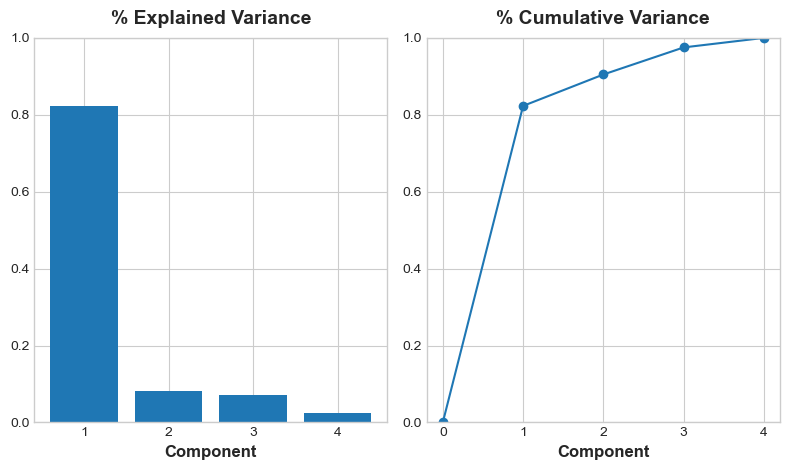

In [140]:
# Look at explained variance
plot_variance(pca);

Let's also look at the MI scores of the components. Not surprisingly, PC1 is highly informative, though the remaining components, despite their small variance, still have a significant relationship with price. Examining those components could be worthwhile to find relationships not captured by the main Luxury/Economy axis.

In [141]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    0.951509
PC2    0.360551
PC4    0.208883
PC3    0.199414
Name: MI Scores, dtype: float64

The third component shows a contrast between horsepower and curb_weight -- sports cars vs. wagons, it seems

In [142]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body-style", "horsepower", "curb-weight"]
train.loc[idx, cols]

,make,body-style,horsepower,curb-weight
129,porsche,hatchback,288,3366
126,porsche,hardtop,207,2756
127,porsche,hardtop,207,2756
128,porsche,convertible,207,2800
105,nissan,hatchback,200,3139
49,jaguar,sedan,262,3950
75,mercury,hatchback,175,2910
136,saab,hatchback,160,2808
137,saab,sedan,160,2847
58,mazda,hatchback,135,2500


To express this contrast, let's create a new ratio feature:

In [143]:
train.price = train.price.astype('int64')

D:\Programy\anaconda3\Lib\site-packages\numpy\core\function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
D:\Programy\anaconda3\Lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

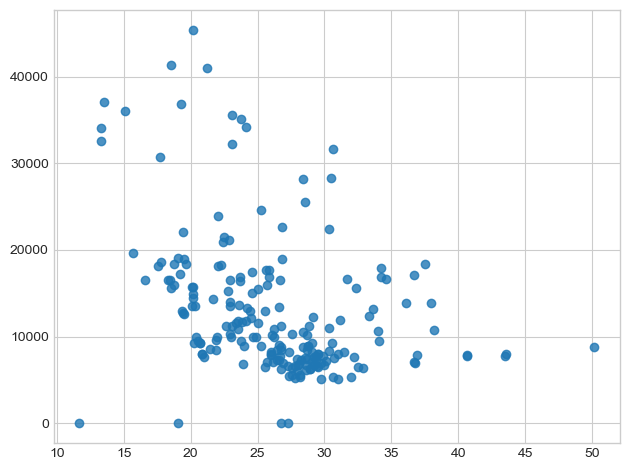

In [144]:
train["sports-or-wagon"] = X['curb-weight'] / X['horsepower']
sns.regplot(x="sports-or-wagon", y='price', data=train, order=2);